<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Машинное-обучение,-ФКН-ВШЭ" data-toc-modified-id="Машинное-обучение,-ФКН-ВШЭ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Машинное обучение, ФКН ВШЭ</a></span><ul class="toc-item"><li><span><a href="#Практическое-задание-5.-Решающие-деревья" data-toc-modified-id="Практическое-задание-5.-Решающие-деревья-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Практическое задание 5. Решающие деревья</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#О-задании" data-toc-modified-id="О-задании-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>О задании</a></span></li><li><span><a href="#Оценивание-и-штрафы" data-toc-modified-id="Оценивание-и-штрафы-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Оценивание и штрафы</a></span></li><li><span><a href="#Формат-сдачи" data-toc-modified-id="Формат-сдачи-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Формат сдачи</a></span></li></ul></li></ul></li><li><span><a href="#1.-Решающие-деревья.-Визуализация." data-toc-modified-id="1.-Решающие-деревья.-Визуализация.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Решающие деревья. Визуализация.</a></span></li><li><span><a href="#2.-Решающие-деревья-своими-руками" data-toc-modified-id="2.-Решающие-деревья-своими-руками-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Решающие деревья своими руками</a></span></li></ul></div>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

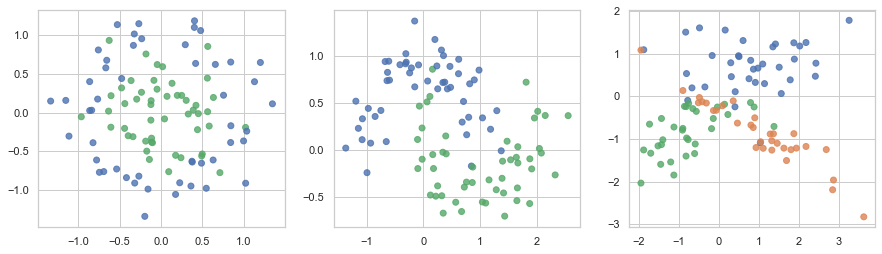

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

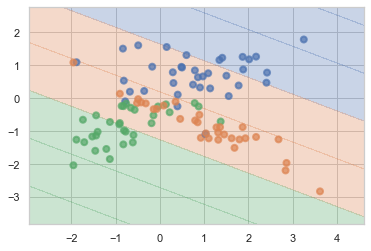

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train accuracy: 1.0,  Test accuracy: 0.7
Train


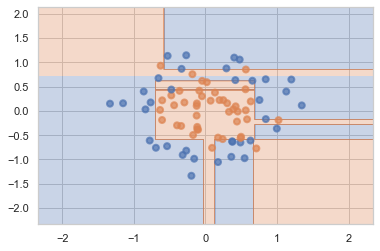

Test


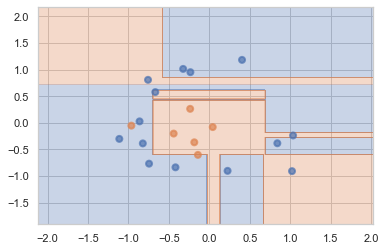

Train accuracy: 1.0,  Test accuracy: 0.95
Train


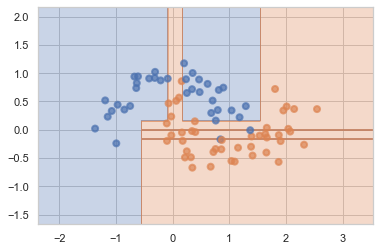

Test


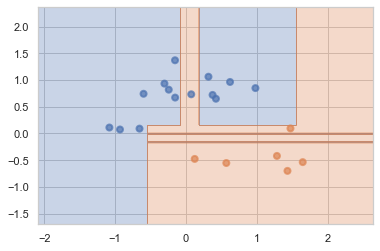

Train accuracy: 1.0,  Test accuracy: 0.7
Train


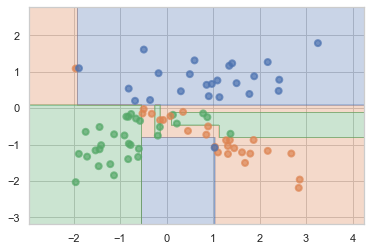

Test


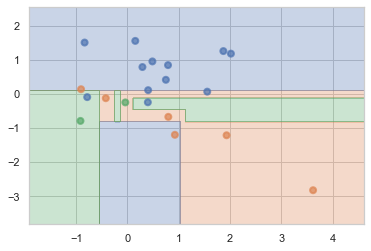

In [7]:
for i, (x, y) in enumerate(datasets):
    X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
    DT = DecisionTreeClassifier()
    DT.fit(X_train,y_train)
    print(f'Train accuracy: {accuracy_score(y_train,DT.predict(X_train))},  Test accuracy: {accuracy_score(y_test,DT.predict(X_test))}')
    print('Train')
    plot_surface(DT, X_train, y_train)
    plt.show()
    print('Test')
    plot_surface(DT, X_test, y_test)
    plt.show()

__Ответ:__ Есть признаки переобучения, например, на выборке circles мы можем заметить, как присутствуют оранжевые зоны в верхнем левом и нижнем правом углу, так как на трейне там были единичные объекты ядрового класса, но это не отражает истинного расположения классов. Подобные особенности есть и на других выборках, что говорит о переобучении

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth: 1, min_samples_leaf: 1
Train accuracy: 0.7,  Test accuracy: 0.45
Train


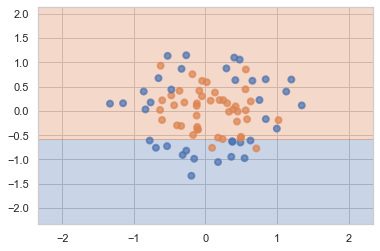

Test


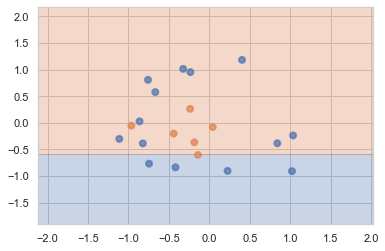

max_depth: 2, min_samples_leaf: 2
Train accuracy: 0.8,  Test accuracy: 0.65
Train


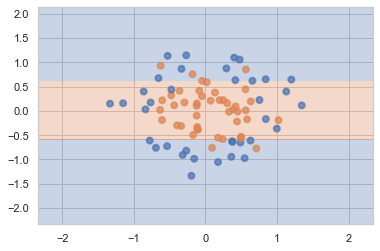

Test


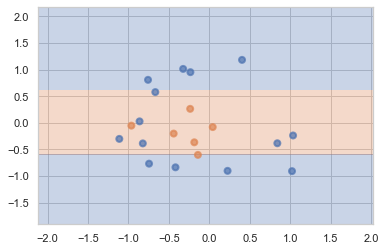

max_depth: 3, min_samples_leaf: 3
Train accuracy: 0.8625,  Test accuracy: 0.75
Train


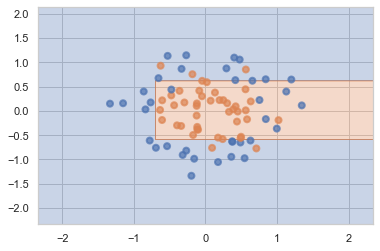

Test


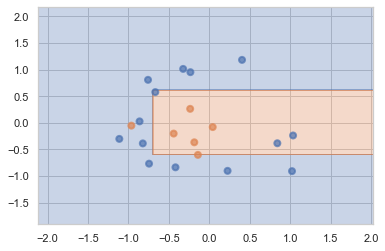

max_depth: 4, min_samples_leaf: 4
Train accuracy: 0.925,  Test accuracy: 0.75
Train


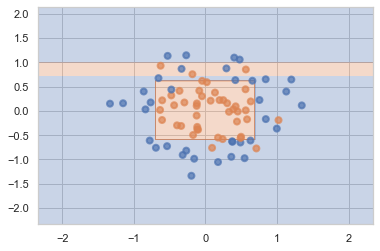

Test


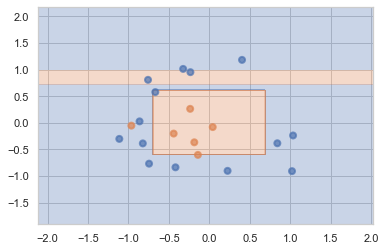

max_depth: 5, min_samples_leaf: 1
Train accuracy: 0.975,  Test accuracy: 0.7
Train


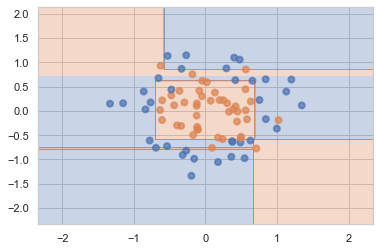

Test


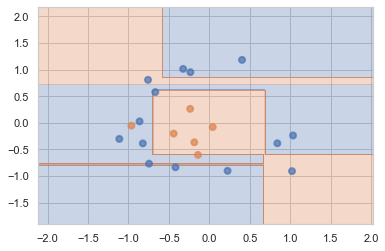

max_depth: 6, min_samples_leaf: 2
Train accuracy: 0.9375,  Test accuracy: 0.85
Train


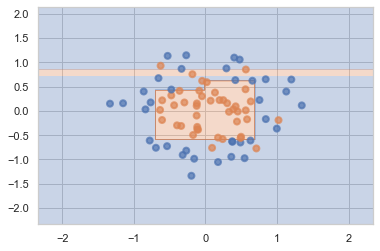

Test


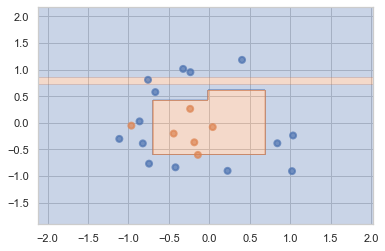

max_depth: 7, min_samples_leaf: 3
Train accuracy: 0.925,  Test accuracy: 0.75
Train


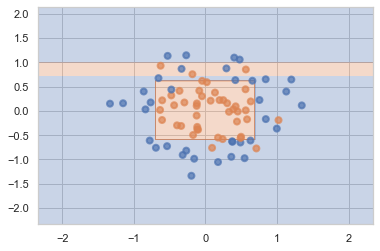

Test


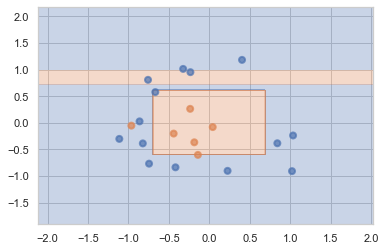

max_depth: 8, min_samples_leaf: 4
Train accuracy: 0.925,  Test accuracy: 0.75
Train


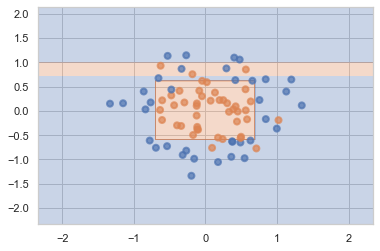

Test


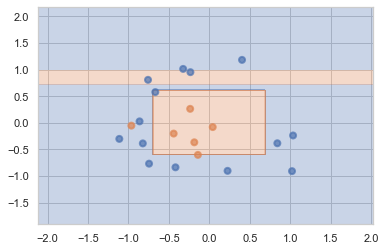

max_depth: 1, min_samples_leaf: 1
Train accuracy: 0.825,  Test accuracy: 0.85
Train


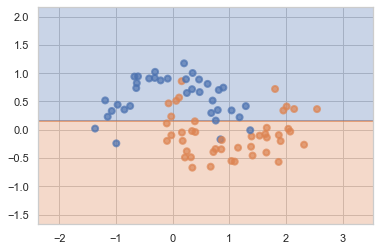

Test


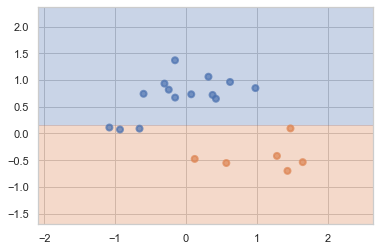

max_depth: 2, min_samples_leaf: 2
Train accuracy: 0.9125,  Test accuracy: 1.0
Train


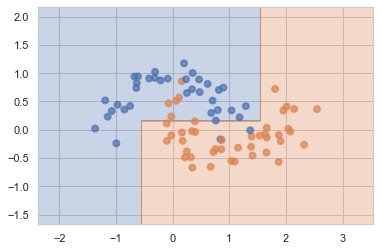

Test


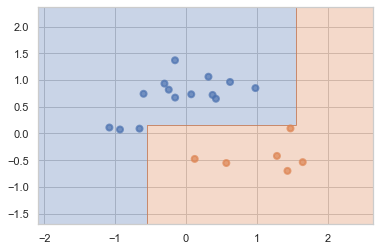

max_depth: 3, min_samples_leaf: 3
Train accuracy: 0.9,  Test accuracy: 1.0
Train


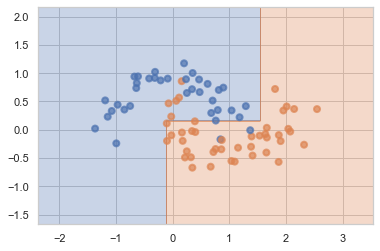

Test


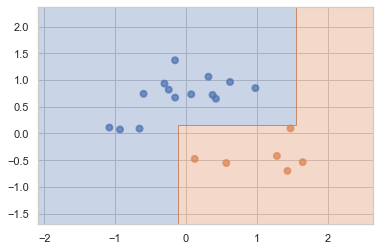

max_depth: 4, min_samples_leaf: 4
Train accuracy: 0.95,  Test accuracy: 0.95
Train


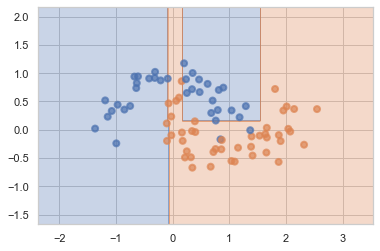

Test


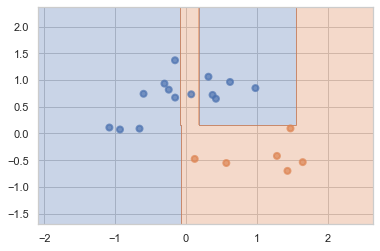

max_depth: 5, min_samples_leaf: 1
Train accuracy: 0.9875,  Test accuracy: 0.95
Train


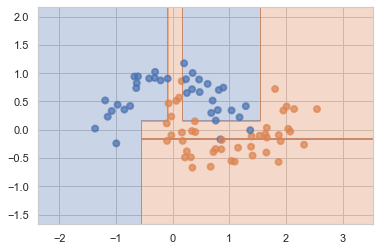

Test


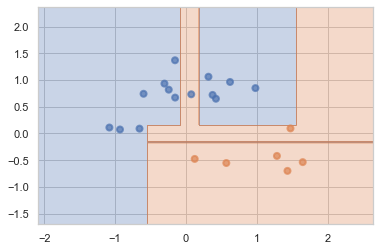

max_depth: 6, min_samples_leaf: 2
Train accuracy: 0.975,  Test accuracy: 0.95
Train


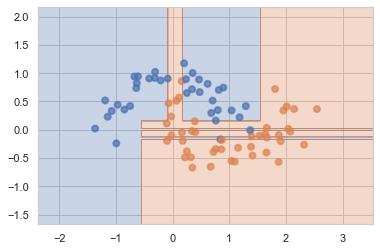

Test


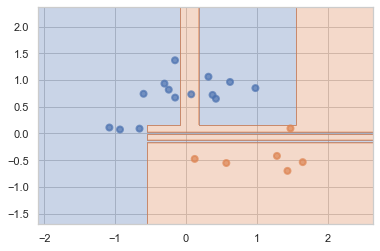

max_depth: 7, min_samples_leaf: 3
Train accuracy: 0.9625,  Test accuracy: 0.95
Train


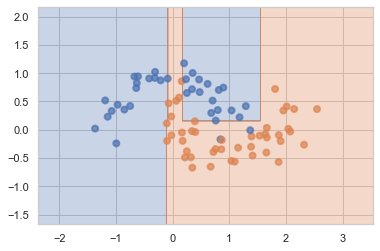

Test


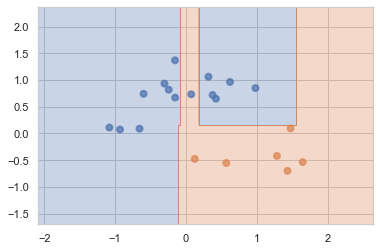

max_depth: 8, min_samples_leaf: 4
Train accuracy: 0.95,  Test accuracy: 0.95
Train


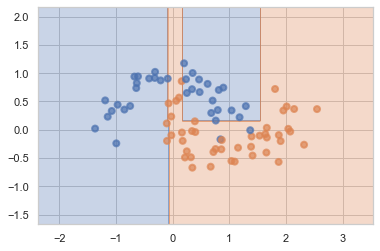

Test


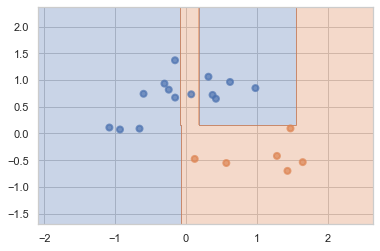

max_depth: 1, min_samples_leaf: 1
Train accuracy: 0.6625,  Test accuracy: 0.55
Train


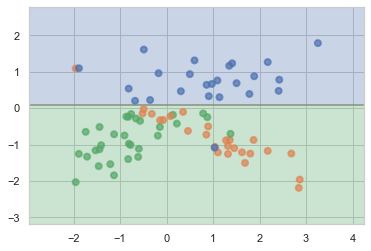

Test


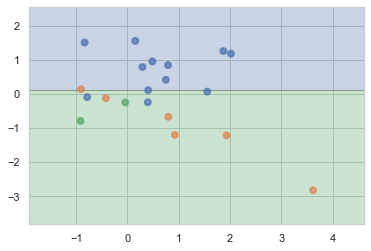

max_depth: 2, min_samples_leaf: 2
Train accuracy: 0.8875,  Test accuracy: 0.75
Train


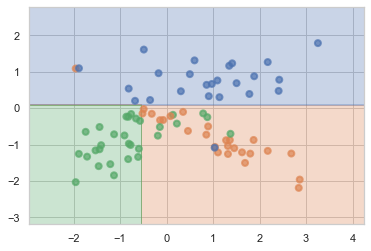

Test


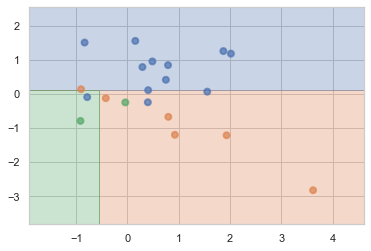

max_depth: 3, min_samples_leaf: 3
Train accuracy: 0.8875,  Test accuracy: 0.75
Train


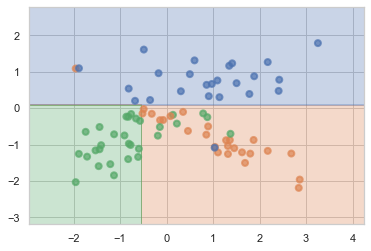

Test


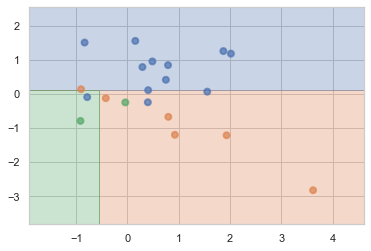

max_depth: 4, min_samples_leaf: 4
Train accuracy: 0.9,  Test accuracy: 0.7
Train


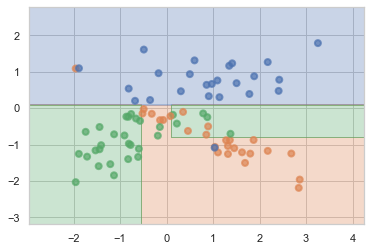

Test


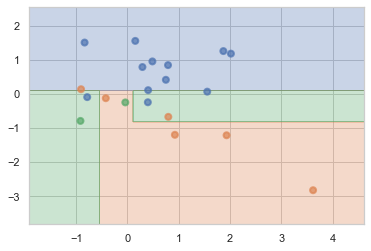

max_depth: 5, min_samples_leaf: 1
Train accuracy: 0.9375,  Test accuracy: 0.7
Train


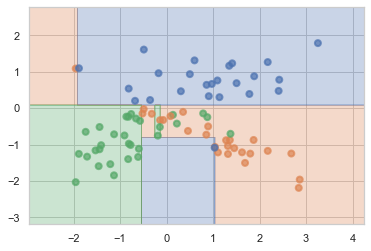

Test


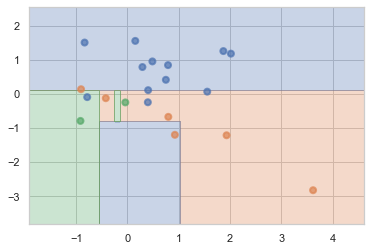

max_depth: 6, min_samples_leaf: 2
Train accuracy: 0.925,  Test accuracy: 0.65
Train


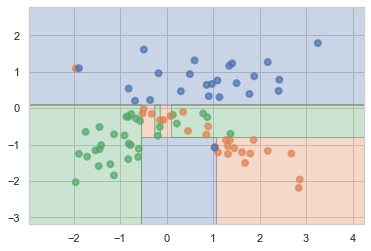

Test


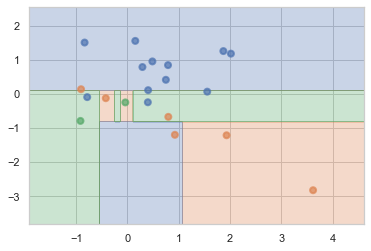

max_depth: 7, min_samples_leaf: 3
Train accuracy: 0.925,  Test accuracy: 0.75
Train


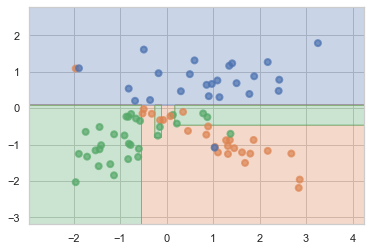

Test


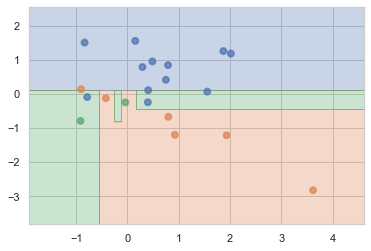

max_depth: 8, min_samples_leaf: 4
Train accuracy: 0.925,  Test accuracy: 0.75
Train


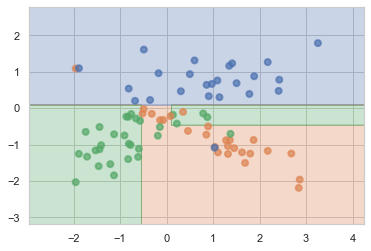

Test


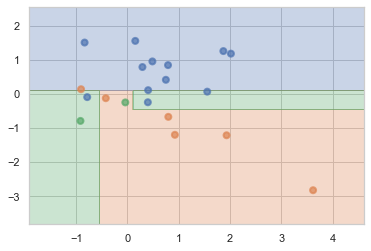

In [8]:

for i, (x, y) in enumerate(datasets):
    for depth,samples in zip(range(1,10),list(range(1,5))*2):
        X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
        print(f'max_depth: {depth}, min_samples_leaf: {samples}')
        DT = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=samples)
        DT.fit(X_train,y_train)
        print(f'Train accuracy: {accuracy_score(y_train,DT.predict(X_train))},  Test accuracy: {accuracy_score(y_test,DT.predict(X_test))}')
        print('Train')
        plot_surface(DT, X_train, y_train)
        plt.show()
        print('Test')
        plot_surface(DT, X_test, y_test)
        plt.show()

__Ответ:__ увеличение гиперпараметров ведет к более корректному описанию выборки, но в какой то момент это приводит к переобучению, из-за того, что модель пытается описать не выборку в целом, а каждый объект. Это приводит к падению метрики на тестовой выборке. На разные датасеты параметры влияют не одинаково, например для выборки с 3 классами переобучение при увеличении max_depth наступает раньше

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [9]:
%load_ext autoreload

In [10]:
%autoreload 2

import numpy as np

from hw5code import find_best_split
from hw5code import DecisionTree

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
frame = pd.read_csv('students.csv')


Text(0.5, 1.0, 'threshold to gini')

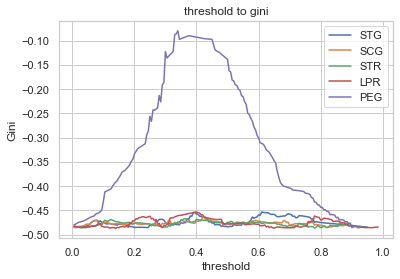

In [12]:
for column in frame.columns[:-1]:
    thr,gini,_,_ = find_best_split(frame.loc[:,column],frame.loc[:,' UNS'])
    plt.plot(thr,gini,label = column)
plt.legend()
plt.xlabel('threshold')
plt.ylabel('Gini')
plt.title('threshold to gini')

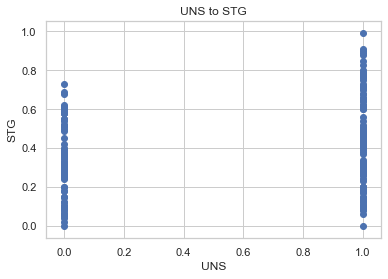

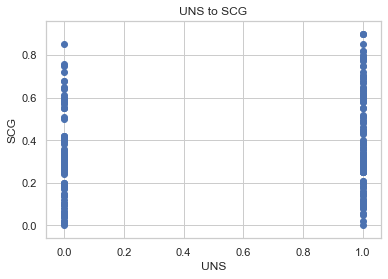

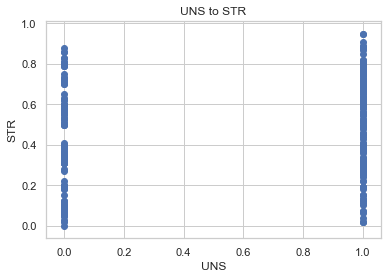

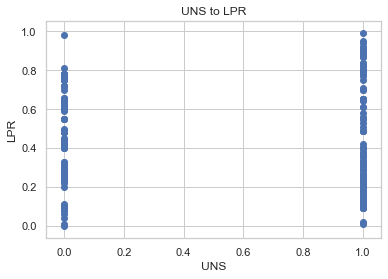

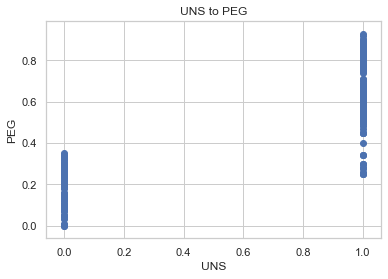

In [13]:
for column in frame.columns[:-1]:
    thr,gini,_,_ = find_best_split(frame.loc[:,column],frame.loc[:,' UNS'])
    plt.scatter(frame.loc[:,' UNS'],frame.loc[:,column])
    plt.xlabel('UNS')
    plt.ylabel(column)
    plt.title('UNS to '+column)
    plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По PEG. Да это согласуется с scatter графиками. У "хороших" признаков на кривой есть выделяющиеся пики и кардинальное изменение Gini. В тоже время остальные признаки очень близки к параллельным к оси Ох прямым

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
frame_musrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')


In [15]:
frame_musrooms.loc[frame_musrooms['p'] == 'e','p'] = 0
frame_musrooms.loc[frame_musrooms['p'] == 'p','p'] = 1

In [16]:
frame_musrooms.iloc[:,1:] = frame_musrooms.iloc[:,1:].apply(LabelEncoder().fit_transform)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(frame_musrooms.iloc[:,1:],frame_musrooms.iloc[:,0],test_size=0.5,random_state=42)

In [18]:
mushrooms = DecisionTree(np.array(['real']*X_train.shape[1]))

In [19]:
mushrooms.fit(X_train.to_numpy(),y_train.to_numpy())

In [20]:
preds = mushrooms.predict(X_test.to_numpy())

In [21]:
accuracy_score(np.array(y_test.tolist()),preds)

1.0

Как и было указано в условии, значение accuracy получилось равным 1

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
frame_tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
frame_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
frame_nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
frame_musrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

In [23]:
frame_musrooms.loc[frame_musrooms['p'] == 'e','p'] = 0
frame_musrooms.loc[frame_musrooms['p'] == 'p','p'] = 1
frame_musrooms.iloc[:,1:] = frame_musrooms.iloc[:,1:].apply(LabelEncoder().fit_transform)
types_mushrooms = np.array(['real']*frame_musrooms.shape[1])


In [24]:
frame_tic_tac.loc[frame_tic_tac['positive'] == 'negative','positive'] = 0
frame_tic_tac.loc[frame_tic_tac['positive'] == 'positive','positive'] = 1
frame_tic_tac.iloc[:,:-1] = frame_tic_tac.iloc[:,:-1].apply(LabelEncoder().fit_transform)
types_tic_tac = np.array(['real']*frame_tic_tac.shape[1])


In [25]:
frame_cars.loc[frame_cars['unacc'] == 'acc','unacc'] = 0
frame_cars.loc[frame_cars['unacc'] == 'good','unacc'] = 1
frame_cars.loc[frame_cars['unacc'] == 'vgood','unacc'] = 1
frame_cars.loc[frame_cars['unacc'] == 'unacc','unacc'] = 0
frame_cars.iloc[:,:-1] = frame_cars.iloc[:,:-1].apply(LabelEncoder().fit_transform)
types_car = np.array(['real']*frame_cars.shape[1])


In [26]:
frame_nursery.loc[frame_nursery['recommend'] == 'not_recom','recommend'] = 0
frame_nursery.loc[frame_nursery['recommend'] == 'recommend','recommend'] = 0
frame_nursery.loc[frame_nursery['recommend'] == 'very_recom','recommend'] = 1
frame_nursery.loc[frame_nursery['recommend'] == 'priority','recommend'] = 1
frame_nursery.loc[frame_nursery['recommend'] == 'spec_prior','recommend'] = 1
frame_nursery.iloc[:,:-1] = frame_nursery.iloc[:,:-1].apply(LabelEncoder().fit_transform)
types_nursery = np.array(['real']*frame_nursery.shape[1])


In [27]:
dic_frames = {'frame_musrooms':(frame_musrooms.iloc[:,1:],frame_musrooms.iloc[:,0],types_mushrooms),
              'frame_tic_tac':(frame_tic_tac.iloc[:,:-1],frame_tic_tac.iloc[:,-1],types_tic_tac),
              'frame_cars':(frame_cars.iloc[:,:-1],frame_cars.iloc[:,-1],types_car),
              'frame_nursery':(frame_nursery.iloc[:,:-1],frame_nursery.iloc[:,-1],types_nursery)}

In [28]:
total_res = pd.DataFrame(index = ['frame_musrooms','frame_tic_tac','frame_cars','frame_nursery'],
                         columns = ['DecisionTree_(real)','DecisionTree_(cat)','DecisionTree_(real+ohe)','DecisionTreeClassifier'])

In [29]:
total_res

,DecisionTree_(real),DecisionTree_(cat),DecisionTree_(real+ohe),DecisionTreeClassifier
frame_musrooms,NaN,NaN,NaN,NaN
frame_tic_tac,NaN,NaN,NaN,NaN
frame_cars,NaN,NaN,NaN,NaN
frame_nursery,NaN,NaN,NaN,NaN


In [30]:
# DecisionTreeClassifier из sklearn
frames_score_sklearn ={}
for name,data in dic_frames.items():
    clf = DecisionTreeClassifier()
    frame_musrooms = frame_musrooms.astype(int)
    scores = cross_val_score(estimator=clf, X=data[0].astype(int), y=data[1].astype(int), cv=10,scoring=make_scorer(accuracy_score))
    total_res.loc[name,'DecisionTreeClassifier'] = np.mean(scores)

In [31]:
total_res

,DecisionTree_(real),DecisionTree_(cat),DecisionTree_(real+ohe),DecisionTreeClassifier
frame_musrooms,NaN,NaN,NaN,0.95829
frame_tic_tac,NaN,NaN,NaN,0.787171
frame_cars,NaN,NaN,NaN,0.944952
frame_nursery,NaN,NaN,NaN,0.999846


In [32]:

from sklearn.base import BaseEstimator, ClassifierMixin

class sk_estim(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.estim = DecisionTree(feature_types=np.array(['real']*X.shape[1]))
        self.estim.fit(X,y)
        return self

    def predict(self, X):
        preds = self.estim.predict(X)
        return preds

In [33]:
# DecisionTree, считающий все признаки вещественными
for name,data in dic_frames.items():
    clf = sk_estim()
    print(name)
    scores = cross_val_score(estimator=clf, X=data[0].astype(int).to_numpy(), y=data[1].astype(int).to_numpy(), cv=10,scoring=make_scorer(accuracy_score))
    total_res.loc[name,'DecisionTree_(real)'] = np.mean(scores)

frame_musrooms
frame_tic_tac
frame_cars
frame_nursery


In [34]:
total_res

,DecisionTree_(real),DecisionTree_(cat),DecisionTree_(real+ohe),DecisionTreeClassifier
frame_musrooms,0.964684,NaN,NaN,0.95829
frame_tic_tac,0.741075,NaN,NaN,0.787171
frame_cars,0.834524,NaN,NaN,0.944952
frame_nursery,0.999846,NaN,NaN,0.999846


In [35]:
# DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
for name,data in dic_frames.items():
    clf = sk_estim()
    print(name)
    
    scores = cross_val_score(estimator=clf, X=pd.get_dummies(data[0].astype(int),sparse=False).to_numpy(), y=data[1].astype(int).to_numpy(), cv=10,scoring=make_scorer(accuracy_score))
    total_res.loc[name,'DecisionTree_(real+ohe)'] = np.mean(scores)

frame_musrooms
frame_tic_tac
frame_cars
frame_nursery


In [36]:
total_res

,DecisionTree_(real),DecisionTree_(cat),DecisionTree_(real+ohe),DecisionTreeClassifier
frame_musrooms,0.964684,NaN,0.964684,0.95829
frame_tic_tac,0.741075,NaN,0.741075,0.787171
frame_cars,0.834524,NaN,0.834524,0.944952
frame_nursery,0.999846,NaN,0.999846,0.999846


In [37]:

from sklearn.base import BaseEstimator, ClassifierMixin

class sk_estim(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.estim = DecisionTree(feature_types=np.array(['categorical']*X.shape[1]))
        self.estim.fit(X,y)
        return self

    def predict(self, X):
        preds = self.estim.predict(X)
        return preds

In [38]:
# DecisionTree, считающий все признаки категориальными
for name,data in dic_frames.items():
    clf = sk_estim()
    print(name)
    scores = cross_val_score(estimator=clf, X=data[0].astype(int).to_numpy(), y=data[1].astype(int).to_numpy(), cv=10,scoring=make_scorer(accuracy_score))
    total_res.loc[name,'DecisionTree_(cat)'] = np.mean(scores)

frame_musrooms
frame_tic_tac
frame_cars
frame_nursery


In [39]:
total_res

,DecisionTree_(real),DecisionTree_(cat),DecisionTree_(real+ohe),DecisionTreeClassifier
frame_musrooms,0.964684,0.746143,0.964684,0.95829
frame_tic_tac,0.741075,0.670154,0.741075,0.787171
frame_cars,0.834524,0.913752,0.834524,0.944952
frame_nursery,0.999846,0.977697,0.999846,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Заметим, что в основном разница оказалась очень незначительной, а некоторые из самописных методов практически совпадают с реализацией от sklearn, а например на frame_musrooms самописные модели показали себя лучше. На остальных же данных свои модели были либо очень близки, либо отличались на ~0.05-0.07. За исключением frame_cars хуже всего себя показал способ со всеми категориальными признаками, это может быть связано с тем, что разбиение по порогу от среднего двух соседних значений дает гораздо лучшее разбиение, чем по категории. Я прогнал код несколько раз и отличающихся значений не получил, поэтому говорить о случайности не приходится, к тому же мы нигде не используем случайную генерацию. Но присутствует некая аномалия, не очень понятно по какой причине именно на frame_cars DecisionTree_(cat) показал себя лучше всего и практически не отличался от DecisionTreeClassifier, возможно это связано с тем, что классы, которые мы определили как 1 и 0 не так уж хорошо разделимы при помощи числовых порогов деления. Мне кажется, что ранжирование самописного алгоритма крайне приближено к sklearn реализации. Чтобы улучшить алгоритм, стоит добавить в него использование гиперпараметров, в данный момент они не используются и разбиение строится на основании gini. Так же разница между sklearn и самописыным может быть связана с наличием гиперпараметров в sklearn реализации.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

*Новогодняя елка, которая спускается в рекурсивное дерево*
<img src ='https://media.giphy.com/media/26tPpuotfKjAE9u8w/giphy.gif' style = 'width: 300px'>
<img src ='https://media.giphy.com/media/xUOxf4w6Nb5CPuOhQQ/giphy.gif' style = 'width: 300px'>>